In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
from os.path import join as path_join
%matplotlib inline

IMAGES_DIR = 'Images'

In [7]:
df.head()

,FamID,CAD,sex,age,tg,hdl,ldl
0,10002,1,1,60,NaN,NaN,NaN
1,10004,1,2,50,55.0,23.0,75.0
2,10005,1,1,55,105.0,37.0,69.0
3,10007,1,1,52,314.0,54.0,108.0
4,10008,1,1,58,161.0,40.0,94.0


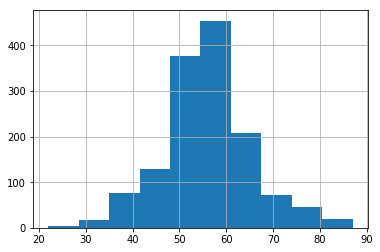

In [24]:
df['age'].hist()

In [9]:
df.corr()

,FamID,CAD,sex,age,tg,hdl,ldl
FamID,1.000000,0.011424,0.057717,0.005399,0.092911,-0.078397,0.095013
CAD,0.011424,1.000000,-0.282969,-0.453795,0.188462,-0.250795,-0.016571
sex,0.057717,-0.282969,1.000000,0.278140,-0.077708,0.381654,0.108627
age,0.005399,-0.453795,0.278140,1.000000,-0.166909,0.199395,-0.047521
tg,0.092911,0.188462,-0.077708,-0.166909,1.000000,-0.298904,0.061793
hdl,-0.078397,-0.250795,0.381654,0.199395,-0.298904,1.000000,0.116218
ldl,0.095013,-0.016571,0.108627,-0.047521,0.061793,0.116218,1.000000


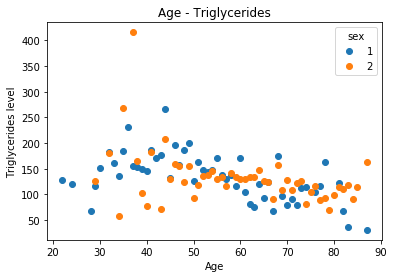

In [10]:
# Age-dependant triglycerides level with sex distinction
df.groupby(['age', 'sex'])['tg'].mean().unstack().plot(marker='o', linestyle='none')
plt.xlabel('Age')
plt.ylabel('Triglycerides level')
plt.title('Age - Triglycerides')
plt.savefig(path_join(IMAGES_DIR, 'age-tg-sex.png'))

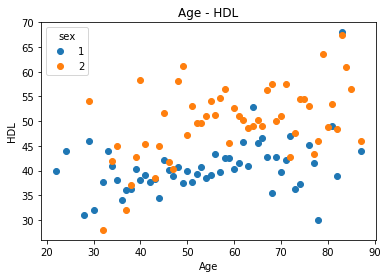

In [11]:
# Age-dependant HDL level with sex distinction
df.groupby(['age', 'sex'])['hdl'].mean().unstack().plot(marker='o', linestyle='none')
plt.xlabel('Age')
plt.ylabel('HDL')
plt.title('Age - HDL')
plt.savefig(path_join(IMAGES_DIR, 'age-hdl-sex.png'))

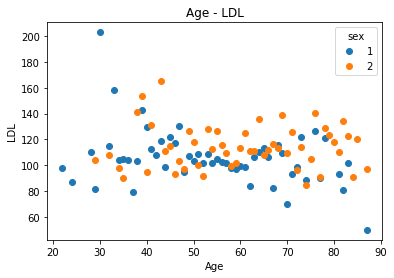

In [12]:
# Age-dependant LDL level with sex distinction
df.groupby(['age', 'sex'])['ldl'].mean().unstack().plot(marker='o', linestyle='none')
plt.xlabel('Age')
plt.ylabel('LDL')
plt.title('Age - LDL')
plt.savefig(path_join(IMAGES_DIR, 'age-ldl-sex.png'))

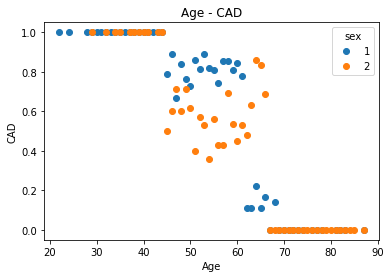

In [13]:
# Age-dependant CAD normalized value with sex distinction
df.groupby(['age', 'sex'])['CAD'].mean().unstack().plot(marker='o', linestyle='none')
plt.xlabel('Age')
plt.ylabel('CAD')
plt.title('Age - CAD')
plt.savefig(path_join(IMAGES_DIR, 'age-cad-sex.png'))

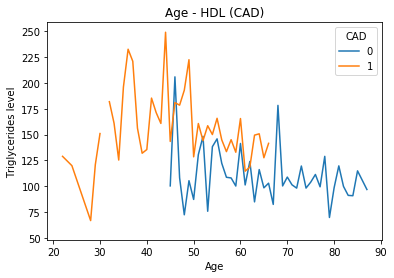

In [14]:
# Age-dependant triglycerides level with CAD distinction
df.groupby(['age', 'CAD'])['tg'].mean().unstack().plot()
plt.xlabel('Age')
plt.ylabel('Triglycerides level')
plt.title('Age - HDL (CAD)')
plt.savefig(path_join(IMAGES_DIR, 'age-hdl-cad.png'))

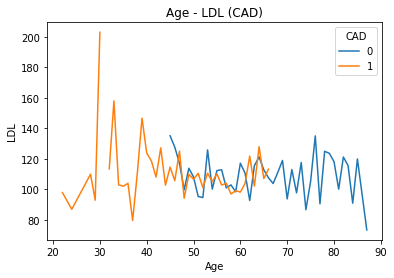

In [15]:
# Age-dependant LDL level with CAD distinction
df.groupby(['age', 'CAD'])['ldl'].mean().unstack().plot()
plt.xlabel('Age')
plt.ylabel('LDL')
plt.title('Age - LDL (CAD)')
plt.savefig(path_join(IMAGES_DIR, 'age-ldl-cad.png'))

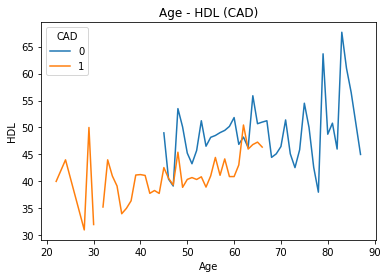

In [16]:
# Age-dependant HDL level with CAD distinction
df.groupby(['age', 'CAD'])['hdl'].mean().unstack().plot()
plt.xlabel('Age')
plt.ylabel('HDL')
plt.title('Age - HDL (CAD)')
plt.savefig(path_join(IMAGES_DIR, 'age-hdl-cad.png'))

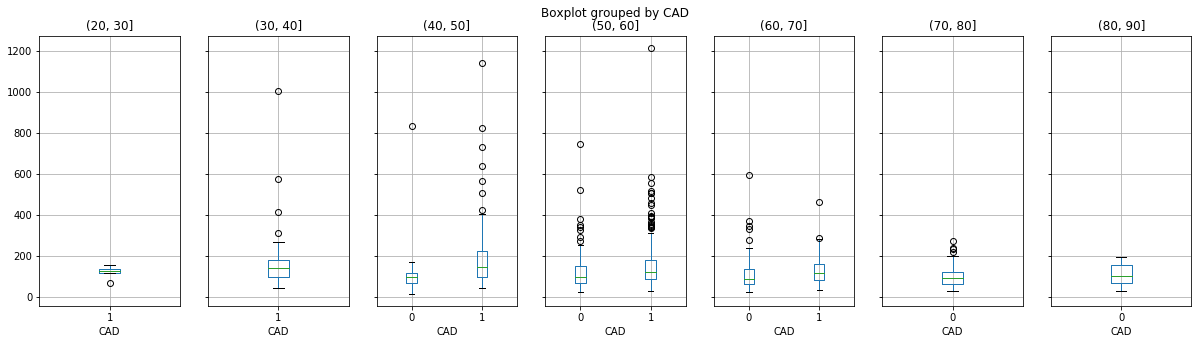

In [68]:
ir = pd.interval_range(start=20, end=90, periods=7)
df.groupby(pd.cut(df['age'], ir)).boxplot(column='tg', by='CAD', figsize=(20, 5), layout=(1, 7))
plt.savefig(path_join(IMAGES_DIR, 'boxplot-age-groups-cad-tg.png'))

In [175]:
# TG
ir = pd.interval_range(start=20, end=90, periods=7)
df.groupby([pd.cut(df['age'], ir), 'CAD'])['tg'].agg(len).unstack() # When 0 and 1 exist, len of lists > 30

CAD,0,1
age,,
"(20, 30]",NaN,8.0
"(30, 40]",NaN,69.0
"(40, 50]",57.0,224.0
"(50, 60]",181.0,519.0
"(60, 70]",132.0,113.0
"(70, 80]",79.0,NaN
"(80, 90]",19.0,NaN


/home/alexey/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/alexey/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


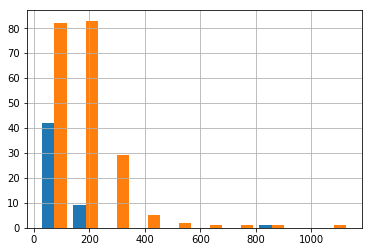

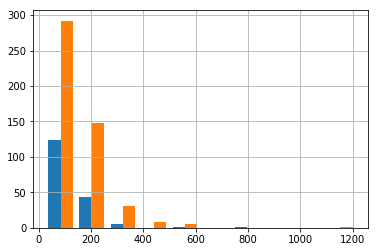

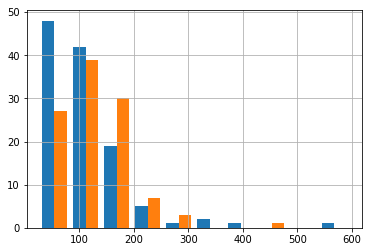

In [172]:
tg_age_cad = df.groupby([pd.cut(df['age'], ir), 'CAD'])['tg'].agg(list).unstack().iloc[2:5]
for c, row in tg_age_cad.iterrows():
    row.hist()
    plt.show()
# Distribution is not normal

In [166]:
ir = pd.interval_range(start=20, end=90, periods=7)
df.groupby([pd.cut(df['age'], ir), 'CAD'])['tg'].agg(len).unstack() # When 0 and 1 exist, len of lists > 30
tg_age_cad = df.groupby([pd.cut(df['age'], ir), 'CAD'])['tg'].agg(list).unstack().iloc[2:5]
for c, row in tg_age_cad.iterrows():
    s, p = stat.mannwhitneyu(row[0], row[1])
    print(p)

1.3964858711629225e-06
4.672195952197328e-07
0.02001093092341893


In [174]:
# HDL
ir = pd.interval_range(start=20, end=90, periods=7)
df.groupby([pd.cut(df['age'], ir), 'CAD'])['hdl'].agg(len).unstack() # When 0 and 1 exist, len of lists > 30

CAD,0,1
age,,
"(20, 30]",NaN,8.0
"(30, 40]",NaN,69.0
"(40, 50]",57.0,224.0
"(50, 60]",181.0,519.0
"(60, 70]",132.0,113.0
"(70, 80]",79.0,NaN
"(80, 90]",19.0,NaN


/home/alexey/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/alexey/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


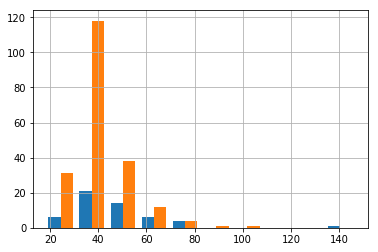

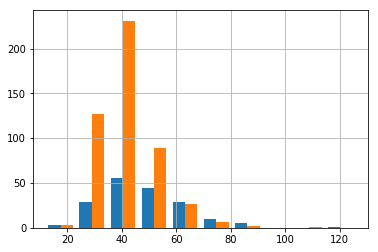

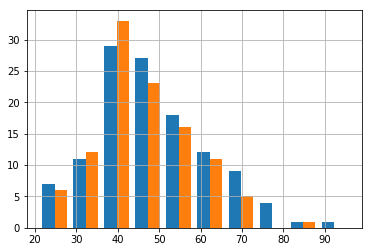

In [179]:
hdl_age_cad = df.groupby([pd.cut(df['age'], ir), 'CAD'])['hdl'].agg(list).unstack().iloc[2:5]
for c, row in tg_age_cad.iterrows():
    row.hist()
    plt.show()
# Distribution is normal

In [203]:
ir = pd.interval_range(start=20, end=90, periods=7)
hdl_age_cad = df.groupby([pd.cut(df['age'], ir), 'CAD'])['hdl'].agg(list).unstack().iloc[2:5]
for c, row in hdl_age_cad.iterrows():
    r1 = np.array(row[0])
    r1 = r1[np.logical_not(np.isnan(r1))]
    r2 = np.array(row[1])
    r2 = r2[np.logical_not(np.isnan(r2))]
    s, p = stat.ttest_ind(r1, r2)
    print(p)

0.0038925301511416014
4.999057734901896e-11
0.1453443557167187


In [201]:
# LDL
ir = pd.interval_range(start=20, end=90, periods=7)
df.groupby([pd.cut(df['age'], ir), 'CAD'])['ldl'].agg(len).unstack() # When 0 and 1 exist, len of lists > 30

CAD,0,1
age,,
"(20, 30]",NaN,8.0
"(30, 40]",NaN,69.0
"(40, 50]",57.0,224.0
"(50, 60]",181.0,519.0
"(60, 70]",132.0,113.0
"(70, 80]",79.0,NaN
"(80, 90]",19.0,NaN


/home/alexey/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/alexey/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


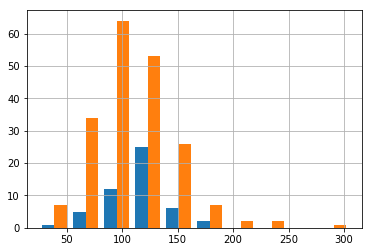

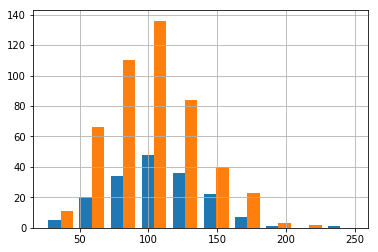

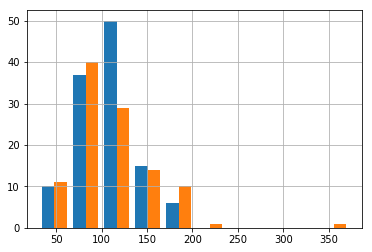

In [204]:
ldl_age_cad = df.groupby([pd.cut(df['age'], ir), 'CAD'])['ldl'].agg(list).unstack().iloc[2:5]
for c, row in ldl_age_cad.iterrows():
    row.hist()
    plt.show()
# Distribution is normal

In [205]:
ir = pd.interval_range(start=20, end=90, periods=7)
ldl_age_cad = df.groupby([pd.cut(df['age'], ir), 'CAD'])['ldl'].agg(list).unstack().iloc[2:5]
for c, row in ldl_age_cad.iterrows():
    r1 = np.array(row[0])
    r1 = r1[np.logical_not(np.isnan(r1))]
    r2 = np.array(row[1])
    r2 = r2[np.logical_not(np.isnan(r2))]
    s, p = stat.ttest_ind(r1, r2)
    print(p)

0.3781718718735193
0.32632042316518795
0.560453294106098
